# Model training

In the notebook, the created feature dataset is used to train a xgboost model. The created model is evaluated

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('mode.chained_assignment', None)

In [2]:
data_file = 'processed_data.csv'

In [3]:
data = pd.read_csv(data_file, usecols=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
data

,v0,v1,v2,a0,a1,a2,brCh0,brCh1,brCh2,max(a),...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
0,4.317031,5.821819,7.165739,0.300958,0.191988,-0.276813,27.799530,39.452352,37.486847,0.300958,...,17.304590,5.768197,-7.999199,39.452352,27.799530,11.652822,104.738730,34.912910,-370.072577,car
1,5.821819,7.165739,0.245416,0.191988,-0.276813,0.022692,39.452352,37.486847,46.695931,0.191988,...,13.232974,4.410991,-3.210786,46.695931,37.486847,9.209083,123.635130,41.211710,-544.913058,car
2,7.165739,0.245416,1.289225,-0.276813,0.022692,0.015589,37.486847,46.695931,19.008692,0.022692,...,8.700380,2.900127,6.040477,46.695931,19.008692,27.687238,103.191470,34.397157,-334.449892,car
3,6.744273,5.644308,5.993547,-0.137496,0.034924,0.100138,19.156264,9.108288,8.079598,0.100138,...,18.382128,6.127376,-10.312425,19.156264,8.079598,11.076666,36.344150,12.114717,-26.688254,car
4,5.644308,5.993547,7.095069,0.034924,0.100138,0.220834,9.108288,8.079598,59.685352,0.220834,...,18.732924,6.244308,-10.491145,59.685352,8.079598,51.605753,76.873238,25.624413,-5.440762,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343318,6.745056,8.057947,7.970676,0.109408,-0.009697,0.063823,25.748830,1.333434,10.546353,0.109408,...,22.773679,7.591226,-16.240736,25.748830,1.333434,24.415396,37.628616,12.542872,51.090516,car
343319,8.057947,7.970676,8.545079,-0.009697,0.063823,0.047273,1.333434,10.546353,17.687351,0.063823,...,24.573702,8.191234,-19.494941,17.687351,1.333434,16.353917,29.567137,9.855712,-2.113833,car
343320,7.970676,8.545079,9.443263,0.063823,0.047273,-0.637435,10.546353,17.687351,50.140135,0.063823,...,25.959018,8.653006,-21.651342,50.140135,10.546353,39.593783,78.373839,26.124613,-106.161895,car
343321,8.545079,9.443263,5.618650,0.047273,-0.637435,0.308895,17.687351,50.140135,36.091117,0.308895,...,23.606992,7.868997,-17.789024,50.140135,17.687351,32.452784,103.918603,34.639534,-212.053692,car


In [4]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [5]:
xgb = XGBClassifier(objective='multi:softprob',
              learning_rate=0.1, #so called `eta` value
              max_depth=14,
              min_child_weight=4,
              subsample= 0.5,
              n_estimators= 100,
              num_class= 5)

xgb.fit(X_train,
         y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=14, min_child_weight=4, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, num_class=5, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.5)

In [6]:
preds = xgb.predict(X_test)

print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds, labels=['car', 'walk', 'bike', 'train']))

              precision    recall  f1-score   support

        bike       0.77      0.65      0.70     10954
         car       0.87      0.77      0.82     33890
       train       0.81      0.56      0.66      2127
        walk       0.68      0.88      0.77     21694

    accuracy                           0.78     68665
   macro avg       0.78      0.71      0.74     68665
weighted avg       0.79      0.78      0.78     68665

0.7790723075802811
[[26022  6420  1174   274]
 [ 1608 19185   901     0]
 [ 1379  2464  7106     5]
 [  777   116    52  1182]]


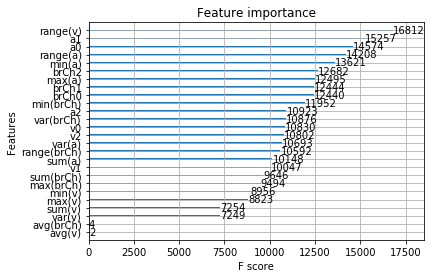

In [8]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb)

In [9]:
import coremltools
coreml = coremltools.converters.xgboost.convert(xgb, 
                                                list(data.iloc[:,:-1].columns.values), 
                                                mode="classifier")
coreml.save('trans_mode.mlmodel')

In [10]:
import joblib
joblib.dump(xgb, "trans_mode.txt") 

['trans_mode.txt']

## TESTS

In [ ]:
import joblib
xgb = joblib.load("trans_mode.txt")

In [ ]:
coremltools.converters.xgboost.convert(xgb, list(data.iloc[:,:-1].columns.values), mode="classifier")

In [11]:
data_raw = pd.read_csv(data_file, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

In [12]:
data_raw

,user,trans_trip,v0,v1,v2,a0,a1,a2,brCh0,brCh1,...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
0,106,0.0,4.317031,5.821819,7.165739,0.300958,0.191988,-0.276813,27.799530,39.452352,...,17.304590,5.768197,-7.999199,39.452352,27.799530,11.652822,104.738730,34.912910,-370.072577,car
1,106,0.0,5.821819,7.165739,0.245416,0.191988,-0.276813,0.022692,39.452352,37.486847,...,13.232974,4.410991,-3.210786,46.695931,37.486847,9.209083,123.635130,41.211710,-544.913058,car
2,106,0.0,7.165739,0.245416,1.289225,-0.276813,0.022692,0.015589,37.486847,46.695931,...,8.700380,2.900127,6.040477,46.695931,19.008692,27.687238,103.191470,34.397157,-334.449892,car
3,106,0.0,6.744273,5.644308,5.993547,-0.137496,0.034924,0.100138,19.156264,9.108288,...,18.382128,6.127376,-10.312425,19.156264,8.079598,11.076666,36.344150,12.114717,-26.688254,car
4,106,0.0,5.644308,5.993547,7.095069,0.034924,0.100138,0.220834,9.108288,8.079598,...,18.732924,6.244308,-10.491145,59.685352,8.079598,51.605753,76.873238,25.624413,-5.440762,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343318,86,0.0,6.745056,8.057947,7.970676,0.109408,-0.009697,0.063823,25.748830,1.333434,...,22.773679,7.591226,-16.240736,25.748830,1.333434,24.415396,37.628616,12.542872,51.090516,car
343319,86,0.0,8.057947,7.970676,8.545079,-0.009697,0.063823,0.047273,1.333434,10.546353,...,24.573702,8.191234,-19.494941,17.687351,1.333434,16.353917,29.567137,9.855712,-2.113833,car
343320,86,0.0,7.970676,8.545079,9.443263,0.063823,0.047273,-0.637435,10.546353,17.687351,...,25.959018,8.653006,-21.651342,50.140135,10.546353,39.593783,78.373839,26.124613,-106.161895,car
343321,86,0.0,8.545079,9.443263,5.618650,0.047273,-0.637435,0.308895,17.687351,50.140135,...,23.606992,7.868997,-17.789024,50.140135,17.687351,32.452784,103.918603,34.639534,-212.053692,car


In [19]:
trip = data_raw[(data_raw['user'] == 128) & (data_raw['trans_trip'] == 1)]

In [20]:
trip

,user,trans_trip,v0,v1,v2,a0,a1,a2,brCh0,brCh1,...,sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh),class
294891,128,1.0,1.107756,0.117637,1.301435,-0.055007,0.007492,0.002412,90.957173,5.274673,...,2.526828,0.842276,0.395862,90.957173,2.349338,88.607835,98.581184,32.860395,1019.583825,walk
294892,128,1.0,0.117637,1.301435,1.364148,0.007492,0.002412,0.005345,5.274673,2.349338,...,2.783220,0.927740,0.433120,5.274673,2.349338,2.925335,11.459121,3.819707,-2.158713,walk
294893,128,1.0,1.301435,1.364148,1.497780,0.002412,0.005345,0.005179,2.349338,3.835110,...,4.163363,1.387788,-0.140053,3.835110,0.896904,2.938206,7.081352,2.360451,-0.833360,walk
294894,128,1.0,1.364148,1.497780,1.601364,0.005345,0.005179,0.000981,3.835110,0.896904,...,4.463292,1.487764,-0.198899,9.750132,0.896904,8.853228,14.482146,4.827382,0.959925,walk
294895,128,1.0,1.497780,1.601364,1.615093,0.005179,0.000981,0.002346,0.896904,9.750132,...,4.714238,1.571413,-0.282642,9.750132,0.896904,8.853228,18.353158,6.117719,3.576989,walk
294896,128,1.0,1.601364,1.615093,1.643246,0.000981,0.002346,-0.003490,9.750132,7.706122,...,4.859704,1.619901,-0.326822,11.624456,7.706122,3.918333,29.080710,9.693570,-26.129233,walk
294897,128,1.0,1.615093,1.643246,1.587401,0.002346,-0.003490,0.001145,7.706122,11.624456,...,4.845740,1.615247,-0.340279,52.280921,7.706122,44.574798,71.611499,23.870500,-35.422384,walk
294898,128,1.0,1.643246,1.587401,1.604571,-0.003490,0.001145,-0.053206,11.624456,52.280921,...,4.835218,1.611739,-0.330516,56.531817,11.624456,44.907362,120.437194,40.145731,-198.140649,walk
294899,128,1.0,1.587401,1.604571,0.966102,0.001145,-0.053206,-0.013899,52.280921,56.531817,...,4.158073,1.386024,-0.288882,56.531817,26.634105,29.897712,135.446844,45.148948,-610.452877,walk
294900,128,1.0,1.604571,0.966102,0.674219,-0.053206,-0.013899,0.175135,56.531817,26.634105,...,3.244892,1.081631,-0.069631,56.531817,26.634105,29.897712,134.114299,44.704766,-493.713274,walk


In [21]:
X_t, y_t = trip.iloc[:,2:-1],trip.iloc[:,-1]

In [22]:
X_t

,v0,v1,v2,a0,a1,a2,brCh0,brCh1,brCh2,max(a),...,range(v),sum(v),avg(v),var(v),max(brCh),min(brCh),range(brCh),sum(brCh),avg(brCh),var(brCh)
294891,1.107756,0.117637,1.301435,-0.055007,0.007492,0.002412,90.957173,5.274673,2.349338,0.007492,...,1.183798,2.526828,0.842276,0.395862,90.957173,2.349338,88.607835,98.581184,32.860395,1019.583825
294892,0.117637,1.301435,1.364148,0.007492,0.002412,0.005345,5.274673,2.349338,3.835110,0.007492,...,1.246511,2.783220,0.927740,0.433120,5.274673,2.349338,2.925335,11.459121,3.819707,-2.158713
294893,1.301435,1.364148,1.497780,0.002412,0.005345,0.005179,2.349338,3.835110,0.896904,0.005345,...,0.196345,4.163363,1.387788,-0.140053,3.835110,0.896904,2.938206,7.081352,2.360451,-0.833360
294894,1.364148,1.497780,1.601364,0.005345,0.005179,0.000981,3.835110,0.896904,9.750132,0.005345,...,0.237217,4.463292,1.487764,-0.198899,9.750132,0.896904,8.853228,14.482146,4.827382,0.959925
294895,1.497780,1.601364,1.615093,0.005179,0.000981,0.002346,0.896904,9.750132,7.706122,0.005179,...,0.117313,4.714238,1.571413,-0.282642,9.750132,0.896904,8.853228,18.353158,6.117719,3.576989
294896,1.601364,1.615093,1.643246,0.000981,0.002346,-0.003490,9.750132,7.706122,11.624456,0.002346,...,0.041882,4.859704,1.619901,-0.326822,11.624456,7.706122,3.918333,29.080710,9.693570,-26.129233
294897,1.615093,1.643246,1.587401,0.002346,-0.003490,0.001145,7.706122,11.624456,52.280921,0.002346,...,0.055845,4.845740,1.615247,-0.340279,52.280921,7.706122,44.574798,71.611499,23.870500,-35.422384
294898,1.643246,1.587401,1.604571,-0.003490,0.001145,-0.053206,11.624456,52.280921,56.531817,0.001145,...,0.055845,4.835218,1.611739,-0.330516,56.531817,11.624456,44.907362,120.437194,40.145731,-198.140649
294899,1.587401,1.604571,0.966102,0.001145,-0.053206,-0.013899,52.280921,56.531817,26.634105,0.001145,...,0.638469,4.158073,1.386024,-0.288882,56.531817,26.634105,29.897712,135.446844,45.148948,-610.452877
294900,1.604571,0.966102,0.674219,-0.053206,-0.013899,0.175135,56.531817,26.634105,50.948376,0.175135,...,0.930351,3.244892,1.081631,-0.069631,56.531817,26.634105,29.897712,134.114299,44.704766,-493.713274


In [23]:
preds = xgb.predict(X_t)

In [24]:
preds

array(['walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk', 'walk',
       'walk', 'walk', 'walk', 'bike', 'bike', 'car', 'car', 'walk',
       'bike', 'car', 'bike', 'car', 'bike', 'walk'], dtype=object)